<a href="https://colab.research.google.com/github/avawaxenberg/FDSfE_AWaxenberg/blob/main/INCLASS/12_11_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

In [2]:
from sklearn.datasets import load_digits

In [3]:
mnist = load_digits()

In [4]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
mnist.data.shape

(1797, 64)

In [8]:
mnist.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [9]:
mnist.images.shape

(1797, 8, 8)

In [10]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

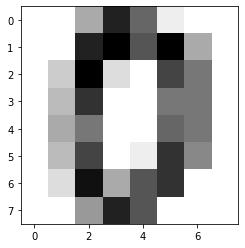

In [12]:
plt.imshow(mnist.images[0], cmap = "binary");

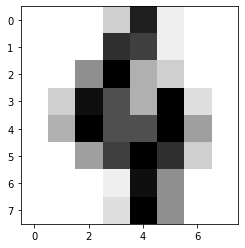

In [13]:
plt.imshow(mnist.images[97], cmap = "binary");

In [15]:
mnist.target.shape

(1797,)

In [20]:
X = mnist.data
y = mnist.target

In [21]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                               random_state =  321,  stratify = y  )

In [31]:
X_train.shape

(1257, 64)

In [32]:
y_train.shape

(1257,)

In [33]:
X_test.shape

(540, 64)

In [34]:
y_test.shape

(540,)

In [35]:
from sklearn.neural_network import MLPClassifier

In [39]:
mlp = MLPClassifier(activation = "relu", hidden_layer_sizes = (20,),
                  random_state = 4, verbose = 1, max_iter = 400)

In [40]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 6.97683915
Iteration 2, loss = 5.24658077
Iteration 3, loss = 4.00447948
Iteration 4, loss = 3.10142116
Iteration 5, loss = 2.45676766
Iteration 6, loss = 2.05124084
Iteration 7, loss = 1.78449591
Iteration 8, loss = 1.57857896
Iteration 9, loss = 1.40750945
Iteration 10, loss = 1.27161156
Iteration 11, loss = 1.15921777
Iteration 12, loss = 1.06144827
Iteration 13, loss = 0.97720116
Iteration 14, loss = 0.89903813
Iteration 15, loss = 0.83356570
Iteration 16, loss = 0.77301816
Iteration 17, loss = 0.71915062
Iteration 18, loss = 0.67108078
Iteration 19, loss = 0.62849211
Iteration 20, loss = 0.59080483
Iteration 21, loss = 0.55613351
Iteration 22, loss = 0.52487172
Iteration 23, loss = 0.49877256
Iteration 24, loss = 0.47483128
Iteration 25, loss = 0.45299929
Iteration 26, loss = 0.43409144
Iteration 27, loss = 0.41591355
Iteration 28, loss = 0.39975074
Iteration 29, loss = 0.38520759
Iteration 30, loss = 0.37207872
Iteration 31, loss = 0.35734517
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20,), max_iter=400, random_state=4, verbose=1)

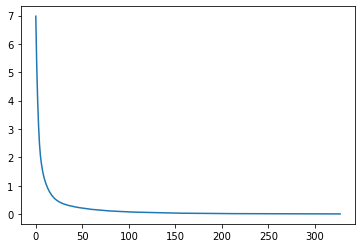

In [41]:
plt.plot(mlp.loss_curve_)

In [42]:
mlp.score(X_train, y_train)

1.0

In [43]:
mlp.score(X_test, y_test)

0.9648148148148148

In [44]:
from sklearn.metrics import classification_report

In [46]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.93      0.96      0.95        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       0.98      0.96      0.97        54
           5       0.98      0.98      0.98        55
           6       0.98      0.98      0.98        54
           7       0.95      0.96      0.95        54
           8       0.92      0.85      0.88        52
           9       0.93      0.94      0.94        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, y_pred)

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 52,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 52,  1,  0],
       [ 1,  2,  0,  0,  0,  1,  0,  1, 44,  3],
       [ 0,  1,  0,  0,  0,  0,  0,  2,  0, 51]])